In [24]:
import numpy as np
import tensorflow as tf
import gpflow
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, ifftshift
import sys
sys.path.append('../../../')
import gpitch


gpitch.amtgp.init_settings()
plt.rcParams['figure.figsize'] = (18, 4)  # set plot size

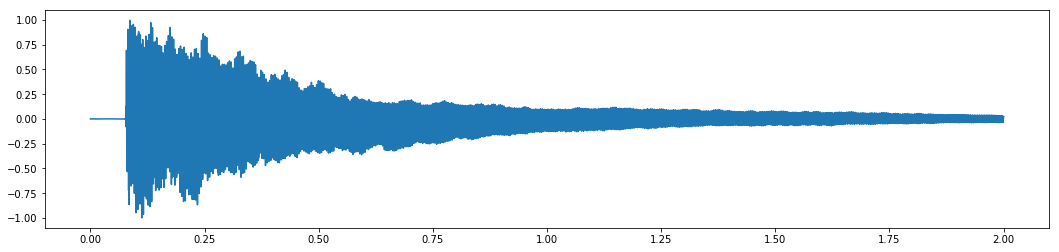

In [25]:
fs, y = gpitch.amtgp.wavread('../../../data/60_1-down.wav', start=10000, N=32000)
N = y.size
x = np.linspace(0, (N-1.)/fs, N).reshape(-1, 1)
plt.figure()
plt.plot(x, y)

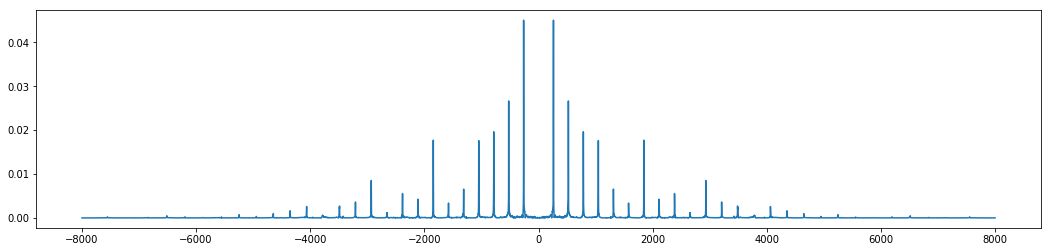

In [34]:
Y = fft(y.reshape(-1,))
S = 1./N*np.abs(fftshift(Y))
F = np.linspace(-0.5*fs, 0.5*fs, N)
plt.figure()
plt.plot(F, S)

(-0.015, 0.015)

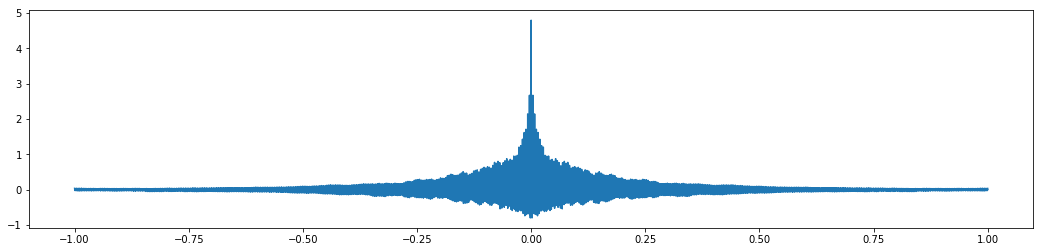

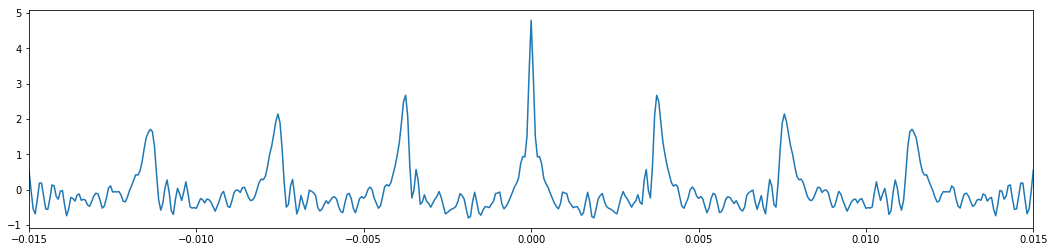

In [29]:
Yhat = np.abs(Y)
yhat = ifft(Yhat)
khat = ifftshift(yhat)

plt.figure()
plt.plot(x-1, khat)

plt.figure()
plt.plot(x-1, khat)
plt.xlim([-0.015, 0.015])

(-300, 300)

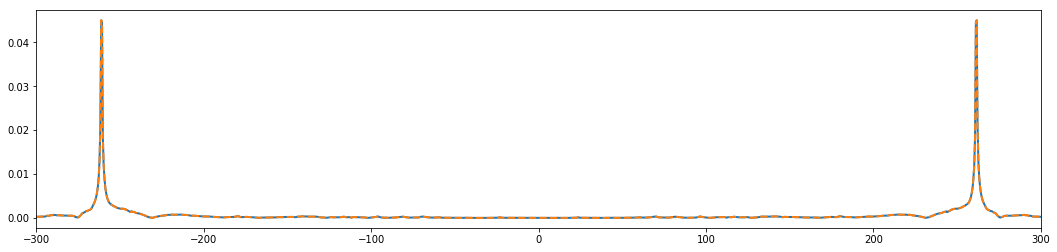

In [43]:
Sk = 1./N*fftshift(np.abs(fft(khat)))

plt.figure()
plt.plot(F, S, '-', lw=2)
plt.plot(F, Sk, '--', lw=2)
plt.xlim([-300, 300])

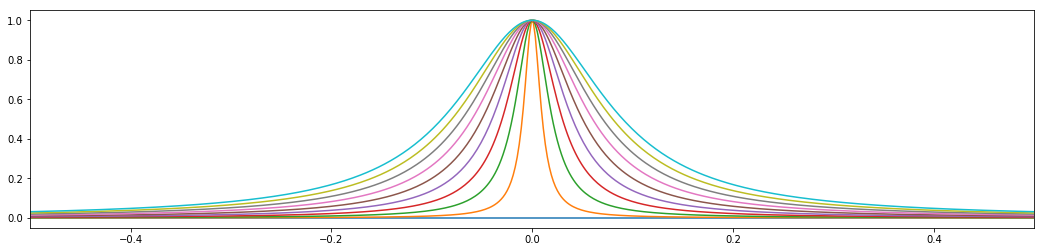

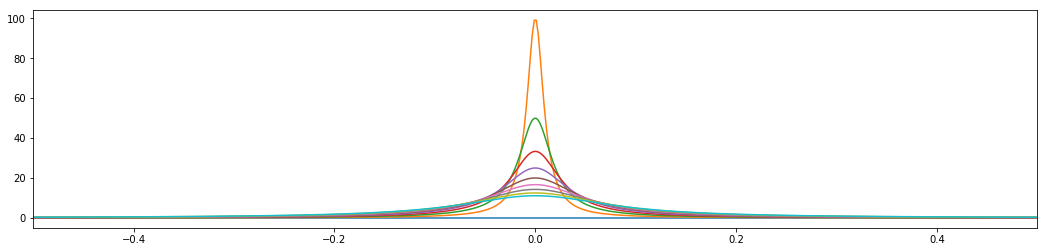

In [50]:
def func(x, a):
    return a**2. / ( a**2 + x**2)

def func2(x, a):
    return a / ( a**2 + x**2)

omega = np.linspace(-10, 10, 10000).reshape(-1,1)
plt.figure()
plt.xlim([-.5, .5])
for i in range(0, 10):
    plt.plot(omega, func(omega, 0.01*i))
    
plt.figure()
plt.xlim([-.5, .5])
for i in range(0, 10):
    plt.plot(omega, func2(omega, 0.01*i))

In [115]:
def k1(x, sig, leng, freq):
    return sig*leng**2. / ( leng**2 + (x - freq)**2)

def k2(x, sig, leng, freq):
    return sig*leng / ( leng**2 + (x - freq)**2)

0.0450485622074


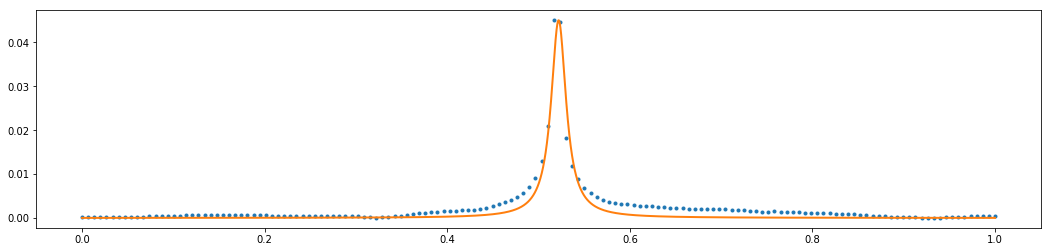

In [144]:
plt.figure()
data = S[15400: 15550].reshape(-1, 1)
xdata = np.linspace(0, 1, data.size).reshape(-1, 1)
plt.plot(xdata, data, '.', lw=2)


xoe = np.linspace(0, 1, 10000).reshape(-1, 1)
oe1 = k1(xoe, sig=data.max(), leng=0.01, freq=.522)
#oe2 = k2(xoe, sig=1.0, leng=0.1, freq=.522)

plt.plot(xoe, oe1, '-', lw=2)
#plt.plot(xoe, oe2, '-', lw=2)
print data.max()